In [32]:
import whisper

# Load the Whisper model
model = whisper.load_model("base")


In [33]:
import os
from dotenv import load_dotenv, dotenv_values 

load_dotenv() 

hfToken = os.getenv("hftoken")


pip install -U openai-whisper
brew install ffmpeg   
pip install pyannote.audio   
  pip install setuptools-rust  
  

In [34]:
# Transcribe an audio file
result = model.transcribe("audioFiles/harvard.wav")

# Print the transcribed text
print(result["text"])

 The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.


In [35]:
result

{'text': ' The stale smell of old beer lingers. It takes heat to bring out the odor. A cold dip restores health and zest. A salt pickle tastes fine with ham. Tacos al pastor are my favorite. A zestful food is the hot cross bun.',
 'segments': [{'id': 0,
   'seek': 0,
   'start': 0.0,
   'end': 4.48,
   'text': ' The stale smell of old beer lingers.',
   'tokens': [50364,
    440,
    342,
    1220,
    4316,
    295,
    1331,
    8795,
    22949,
    433,
    13,
    50588],
   'temperature': 0.0,
   'avg_logprob': -0.25381717397205866,
   'compression_ratio': 1.4210526315789473,
   'no_speech_prob': 0.022390203550457954},
  {'id': 1,
   'seek': 0,
   'start': 4.48,
   'end': 7.0200000000000005,
   'text': ' It takes heat to bring out the odor.',
   'tokens': [50588, 467, 2516, 3738, 281, 1565, 484, 264, 41176, 13, 50715],
   'temperature': 0.0,
   'avg_logprob': -0.25381717397205866,
   'compression_ratio': 1.4210526315789473,
   'no_speech_prob': 0.022390203550457954},
  {'id': 2,
 

# Testing Pyannote - Speech Diarization

In [36]:
from pyannote.audio import Pipeline
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization-3.1",
                                    use_auth_token=hfToken)

# Pipeline.from_pretrained("")
# apply the pipeline to an audio file
diarization = pipeline("audioFiles/suchir1.wav")

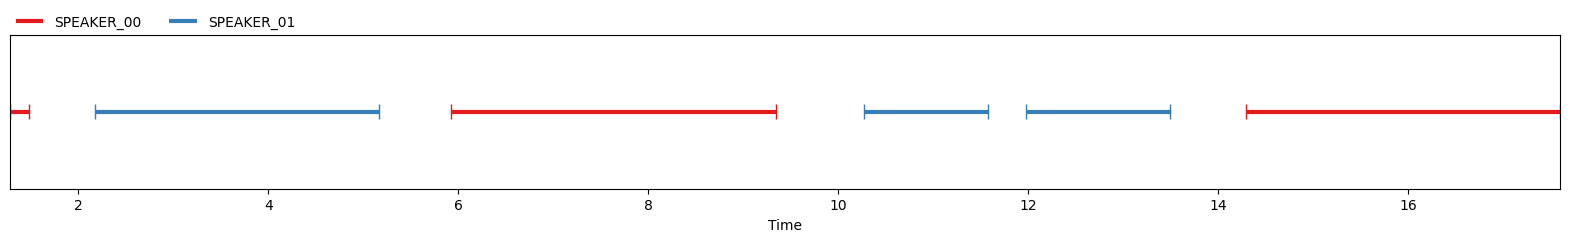

In [37]:
diarization

In [38]:
import torch
pipeline.to(torch.device("cpu"))

# apply pretrained pipeline
diarization = pipeline("audioFiles/suchir1.wav")

# print the result
for turn, _, speaker in diarization.itertracks(yield_label=True):
    print(f"start={turn.start:.1f}s stop={turn.end:.1f}s speaker_{speaker}")

start=0.3s stop=1.0s speaker_SPEAKER_01
start=1.0s stop=1.5s speaker_SPEAKER_00
start=2.2s stop=5.2s speaker_SPEAKER_01
start=5.9s stop=9.3s speaker_SPEAKER_00
start=10.3s stop=11.6s speaker_SPEAKER_01
start=12.0s stop=13.5s speaker_SPEAKER_01
start=14.3s stop=17.7s speaker_SPEAKER_00
start=18.5s stop=22.1s speaker_SPEAKER_01
start=22.5s stop=24.0s speaker_SPEAKER_00


# WhisperX Demo

In [48]:
audioPath = "audioFiles/suchir1.wav"

In [49]:
script = model.transcribe(audioPath)


In [50]:
from whisperx.diarize import DiarizationPipeline

diarization_pipeline = DiarizationPipeline(use_auth_token=hfToken)
diarized = diarization_pipeline(audioPath)

In [51]:
diarized

,segment,label,speaker,start,end
0,[ 00:00:00.284 --> 00:00:00.317],A,SPEAKER_00,0.284094,0.317844
1,[ 00:00:00.317 --> 00:00:01.026],B,SPEAKER_01,0.317844,1.026594
2,[ 00:00:01.026 --> 00:00:01.448],C,SPEAKER_00,1.026594,1.448469
3,[ 00:00:02.174 --> 00:00:05.144],D,SPEAKER_01,2.174094,5.144094
4,[ 00:00:05.920 --> 00:00:08.654],E,SPEAKER_00,5.920344,8.654094
5,[ 00:00:08.856 --> 00:00:09.345],F,SPEAKER_00,8.856594,9.345969
6,[ 00:00:10.274 --> 00:00:11.505],G,SPEAKER_01,10.274094,11.505969
7,[ 00:00:11.978 --> 00:00:13.497],H,SPEAKER_01,11.978469,13.497219
8,[ 00:00:14.290 --> 00:00:17.732],I,SPEAKER_00,14.290344,17.732844
9,[ 00:00:18.492 --> 00:00:22.120],J,SPEAKER_01,18.492219,22.120344


In [52]:
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [53]:
from whisperx import load_align_model, align
from whisperx.diarize import assign_word_speakers

In [54]:
model_a, metadata = load_align_model(language_code=script["language"], device=DEVICE)
script_aligned = align(script["segments"], model_a, metadata, audioPath, DEVICE)

# Align Speakers
result_segments, word_seg = list(assign_word_speakers(
    diarized, script_aligned
).values())
transcribed = []
for result_segment in result_segments:
    transcribed.append(
        {
            "start": result_segment["start"],
            "end": result_segment["end"],
            "text": result_segment["text"],
            "speaker": result_segment["speaker"],
        }
    )

In [55]:
for start, end, text, speaker in [i.values() for i in transcribed]:
    print(start, end, speaker, text)


0.303 0.788 SPEAKER_01  Hey, what's up?
0.808 1.394 SPEAKER_00 What are you doing?
2.261 2.784 SPEAKER_01  Not much.
3.206 4.472 SPEAKER_01 Just playing some Minecraft.
4.553 5.015 SPEAKER_01 How about you?
6.0 9.256 SPEAKER_00  I'm trying to test out this audio detection program.
10.583 11.447 SPEAKER_01  That's really cool.
11.467 13.397 SPEAKER_01 What would the detection do?
14.322 17.658 SPEAKER_00  It will identify various speakers inside of an audio file.
18.603 22.0 SPEAKER_01  Oh, so will it detect me as a person and you as a person?
22.687 23.212 SPEAKER_00  Exactly.
23.232 23.939 SPEAKER_00 That's the goal.
